In [1]:
import sys
sys.path.append('../')

from tasks.series import narma
import numpy as np
from util.plots import plot_sequence

NRMSE = lambda y,y_fit: np.mean(((y-y_fit)**2)/np.var(y))

In [7]:
import numpy as np

# Parameters
n = 300
n_io = 0

# Binarize w_res
# Generate random binary weights (-1, 0, 1)
w_res = np.random.choice([-1, 0, 1], size=(n, n), p=[0.33, 0.34, 0.33])
# w_res = np.random.choice([0, 1], size=(n, n), p=[0.5, 0.5])

# Normalize by spectral radius
spectral_radius = max(np.abs(np.linalg.eigvals(w_res)))
w_res = w_res / spectral_radius if spectral_radius != 0 else w_res

# Generate NARMA sequence
u, y = narma(2000, 10)

# Fit model
w_out, state = fit(u, w_res, y_train=y)

# Compute predictions and NRMSE
y_fit = w_out.T @ state
nrmse = NRMSE(y, y_fit)  # Normalized Root Mean Square Error

print("NRMSE:", nrmse)


NRMSE: 0.18865906375183386


In [3]:
import sys
sys.path.append('../')
from tasks.metrics import *
import numpy as np
from tasks.series import narma

def get_seed(input_nodes, output_nodes, n_states):
    
    if input_nodes or output_nodes:
        n_nodes = input_nodes + output_nodes + 1
        A = np.zeros((n_nodes, n_nodes), dtype=int)
        
        # input nodes
        for i in range(input_nodes):
            A[i, -1] = 1
        # output nodes
        for i in range(input_nodes, input_nodes+output_nodes):
            A[-1, i] = 1

        S = np.zeros((n_nodes, n_states), dtype=int)  
        S[:, 0] = 1
    else:
        A = np.array([[0]])
        S = np.zeros((1, n_states), dtype=int)  
        S[0, 0] = 1
    return A, S

A, S = get_seed(4, 4, 3)
reservoir = Reservoir(A=A, S=S, input_nodes=4, output_nodes=4)

In [4]:
u, y = narma(2000, 10)

u.shape

(1, 1980)

In [12]:
w_out, state = reservoir.fit(u, y_train=y)

(w_out @ state).shape

(1980,)

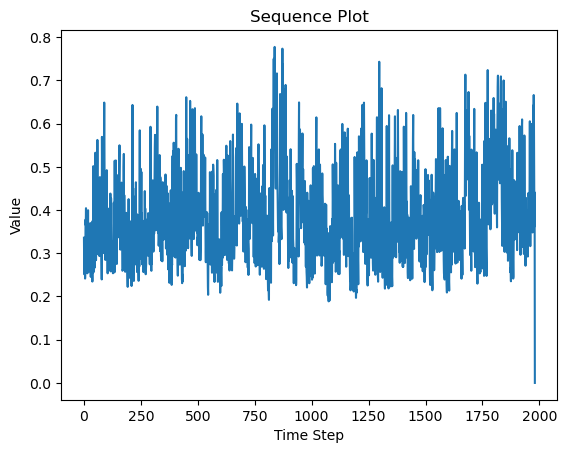

In [10]:
plot_sequence(y)